## Problem Statement

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies,and the number of available parking spaces, among other things. Using the booking information about these hotels, the challenge is to build a model to predict booking cancellation based on the following fields:


## Data Definition:


1) hotel (str) - Hotel (H1 = Resort Hotel or H2 = City Hotel)

2) lead_time (int) - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

3) arrival_date_year (int) - Year of arrival date

4) arrival_date_month (str) - Month of arrival date

5) arrival_date_week_number (int) - Week number of year for arrival date

6) arrival_date_day_of_month (int) - Day of arrival date

7) stays_in_weekend_nights (int) - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

8) stays_in_week_nights (int) - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

9) adults (int) - Number of adults

10) children (float) - Number of children

11) babies (int) - Number of babies

12) meal (str) - Type of meal booked. Categories are presented in standard hospitality meal packages:
     (Undefined/SC = no meal package, BB = Bed & Breakfast, HB = Half board – breakfast and one other meal - usually dinner, FB = Full board – breakfast, lunch and dinner)

13) country (str) - Country of origin. Categories are represented in the ISO 3155–3:2013 format

14) market_segment (str) - Market segment designation (TA = Travel Agents, TO = Tour Operators)

15) distribution_channel (str) - Booking distribution channel (TA = Travel Agents, TO = Tour Operators)

16) is_repeated_guest (int) - Value indicating if the booking name was from a repeated guest (1) or not (0)

17) previous_cancellations (int) - Number of previous bookings that were cancelled by the customer prior to the current booking

18) previous_bookings_not_canceled (int) - Number of previous bookings not cancelled by the customer prior to the current booking

19) reserved_room_type (str) - Code of room type reserved. Code is presented instead of designation for anonymity reasons

20) assigned_room_type (str) - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

21) booking_changes (int) - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

22) deposit_type (str) - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: (No Deposit = no deposit was made, Non Refund = a deposit was made in the value of the total stay cost, Refundable = a deposit was made with a value under the total cost of stay)

23) agent (float) - ID of the travel agency that made the booking

24) company (float) - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

25) days_in_waiting_list (int) - Number of days the booking was in the waiting list before it was confirmed to the customer

26) customer_type (str) - Type of booking, assuming one of four categories: (Contract = when the booking has an allotment or other type of contract associated to it, Group = when the booking is associated to a group, Transient = when the booking is not part of a group or contract, and is not associated to other transient booking, Transient-party = when the booking is transient, but is associated to at least other transient booking

27) adr (float) - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

28) required_car_parking_spaces (int) - Number of car parking spaces required by the customer

29) total_of_special_requests (int) - Number of special requests made by the customer (e.g. twin bed or high floor)

30) reservation_status (str) - Reservation last status, assuming one of three categories: (Canceled = booking was canceled by the customer, Check-Out = customer has checked in but already departed, No-Show = customer did not check-in and did inform the hotel of the reason why)

31)reservation_status_date (str) - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel



####  Import Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()



#### Read the Data

In [82]:
df=pd.read_csv(r'C:\Users\thoma\OneDrive\Desktop\pga08 0nline\project materials\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [83]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [7]:
# Check duplicate data
df.duplicated().sum()

31994

In [84]:
# Remove duplicated data, keep the first row
df.drop_duplicates(inplace = True, keep = 'first')

### EDA

In [9]:
df['target']=df['is_canceled']


In [10]:
df.drop('is_canceled',axis=1,inplace=True)

In [11]:
# As it is a classification task we should analysis the target feature

df['target'].value_counts()

0    63371
1    24025
Name: target, dtype: int64

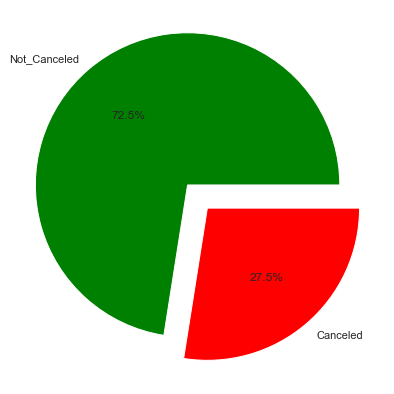

In [12]:
plt.figure(figsize = (12, 7))
labels = ['Not_Canceled', 'Canceled']
explode = [.1, .1]
mycolors = ['Green', 'Red' ]
sizes = df['target'].value_counts().values

plt.pie(sizes, explode, labels, autopct="%1.1f%%", colors = mycolors)
plt.show()

We can observe a imbalance in the distribution of both class.

*) From all the data 72% is consist of booking not cancelled.

*)27.5% data is belong to the flights on booking cancelled.

In [13]:
# Check primary/categorical features unique values

categorical_features = ['hotel', 'target', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', \
    'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

print(f"Unique values by features\n")

for feature in categorical_features:
    unique_values = df[feature].unique()
    print(f"{feature}:\n {unique_values}\n")

Unique values by features

hotel:
 ['Resort Hotel' 'City Hotel']

target:
 [0 1]

meal:
 ['BB' 'FB' 'HB' 'SC' 'Undefined']

country:
 ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA'

Based on the information, the meal value 'Undefined' is invalid. Since the meal is not defined, it is assumed as self-catered 'SC' as described in DATA description

As for the distribution_channel, the 'undefined' value is assumed to be 'Direct' booking

In [14]:
# Replace meal category from 'Undefined' to 'SC'

df['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [15]:
# Replace meal category from 'Undefined' to 'SC'

df['market_segment'].replace(to_replace = 'Undefined', value = 'Direct', inplace = True)

In [16]:
#listing all numerical columns

num_list=df.select_dtypes(include= np.number)
num_list.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,target
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1,0


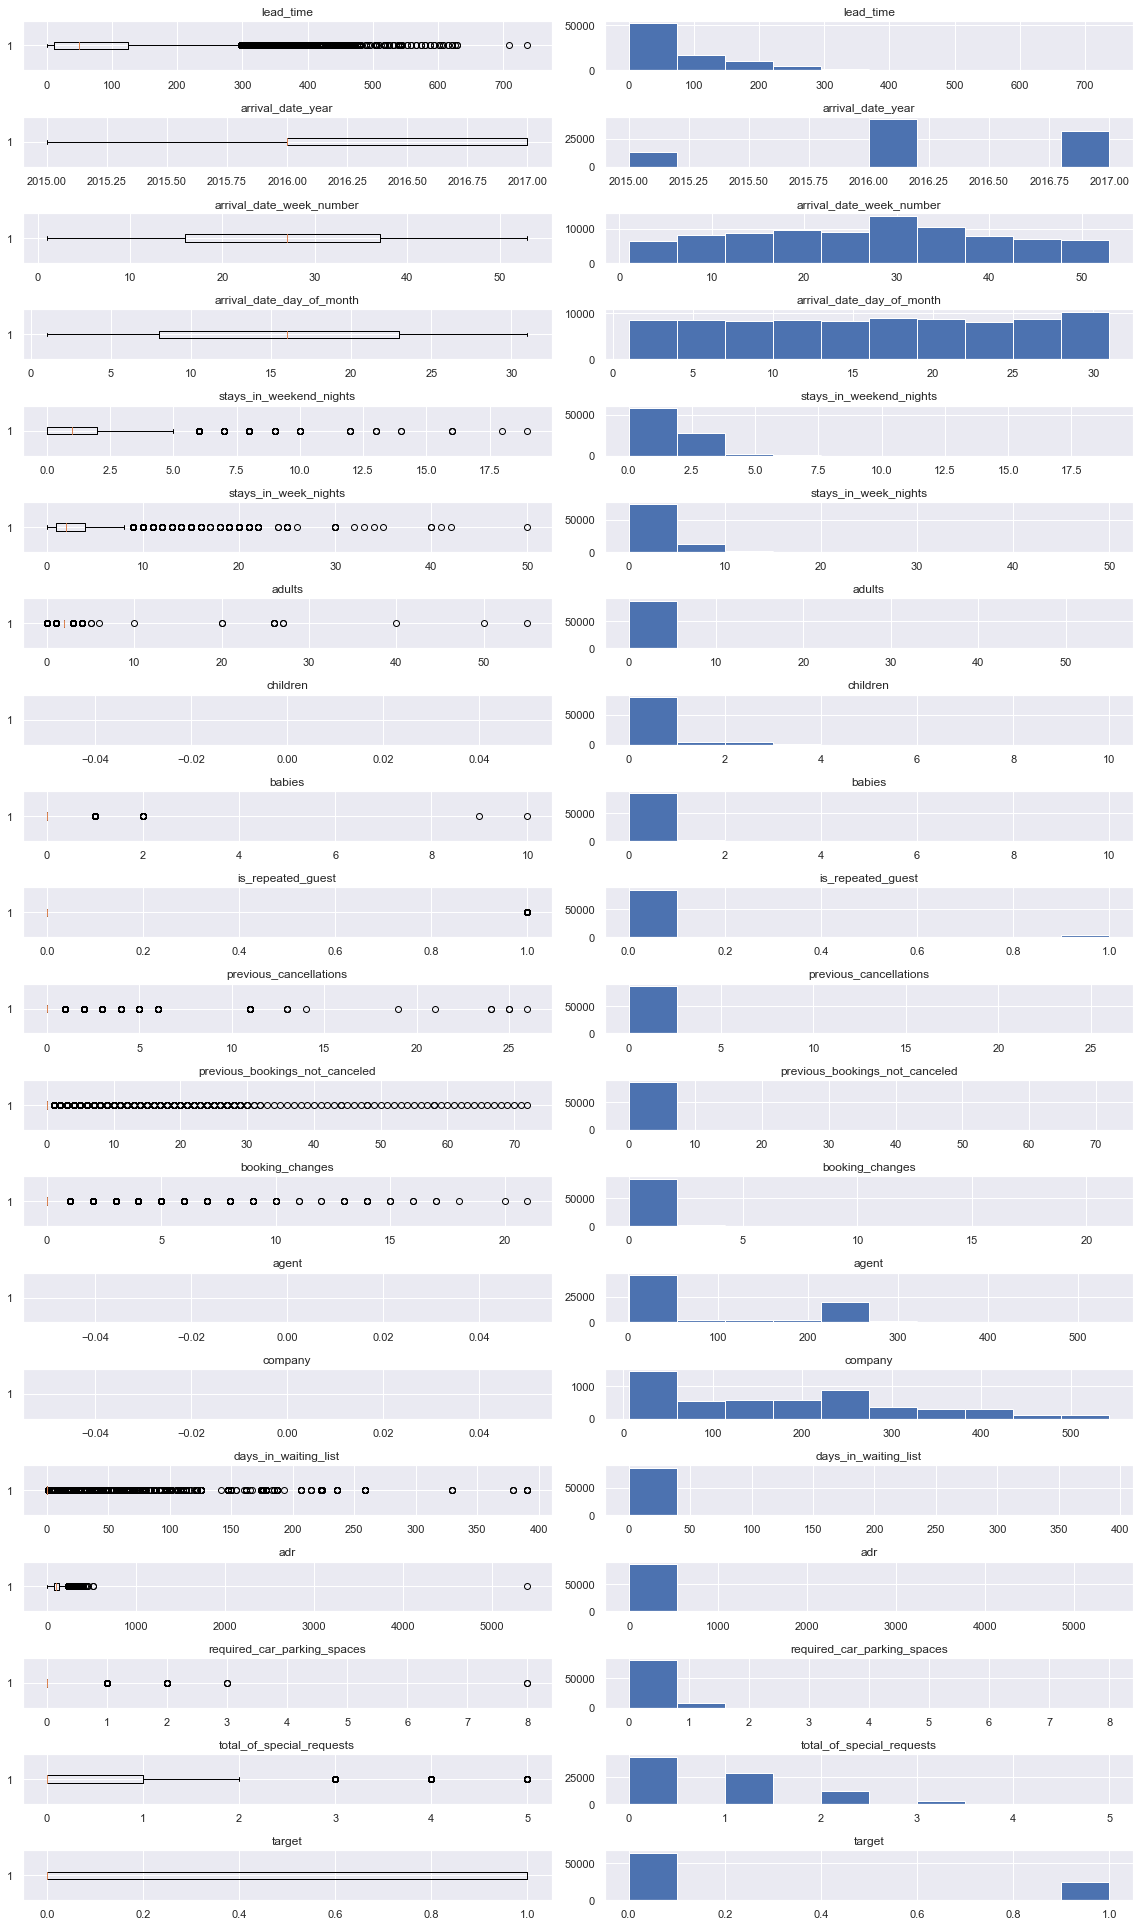

In [17]:
n = 1

plt.figure(figsize = (16, 28))

for i in num_list:
    plt.subplot(21,2,n)
    plt.boxplot(df[i], vert = False)
    plt.title(f'{i}')
    n = n + 1
    
    plt.subplot(21,2,n)
    plt.hist(df[i])
    plt.title(f'{i}')
    n = n + 1
    plt.tight_layout()

Based on the boxplot, there are obvious outliers in the dataset represented by the extreme values plotted.

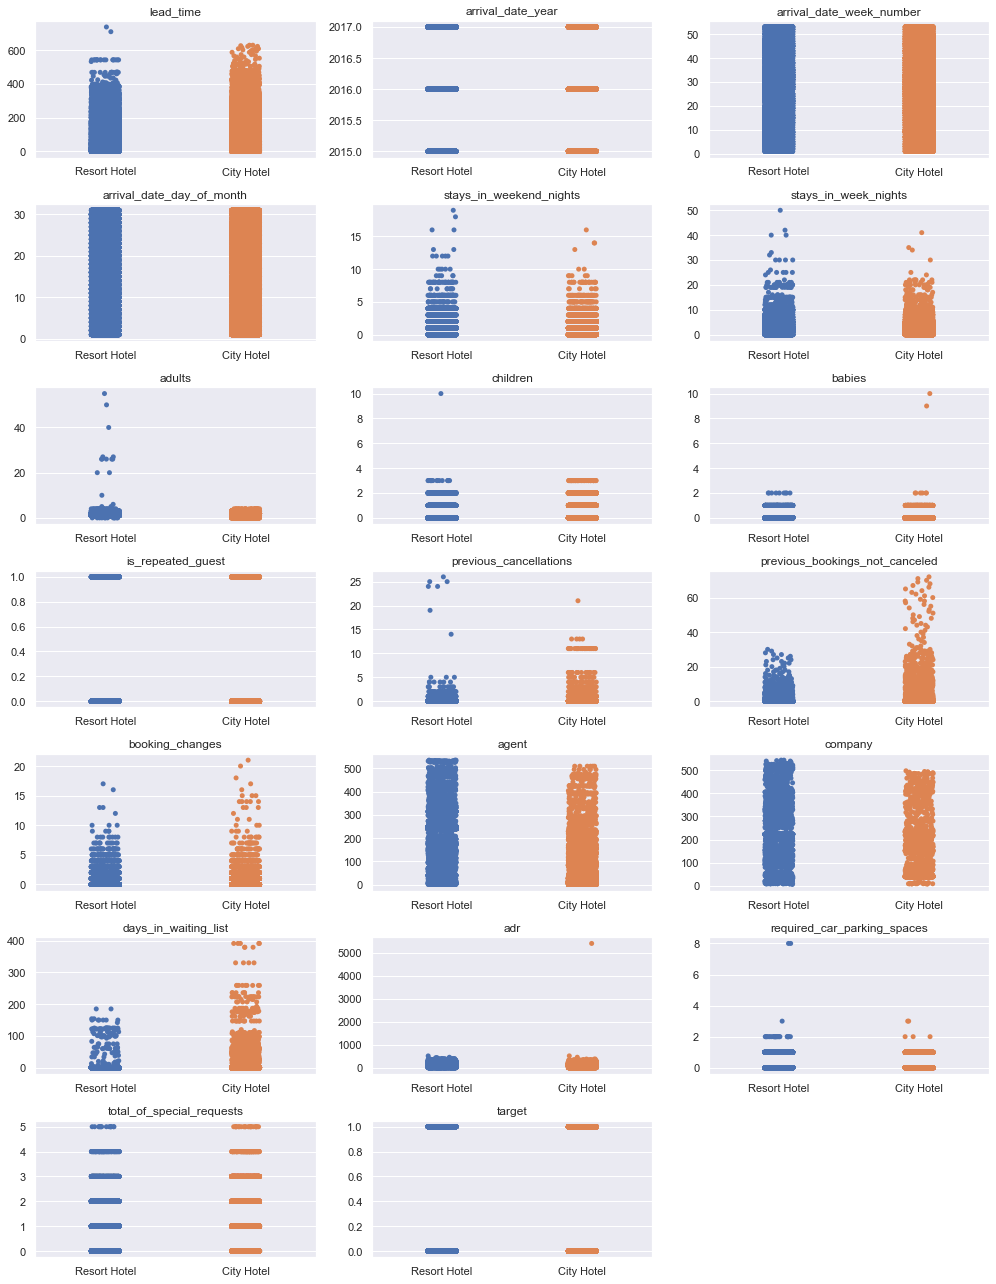

In [18]:
# in order to make it more clear, the data need to be splitted into the city hotel and resort hotel dataset.
#This is because of the different hotel are usually reflected with different features value 
#and patterns due to different business model.


# Visualize differences in data distribution between city and resort hotels

n = 1

plt.figure(figsize = (14, 18))

for i in num_list:
    plt.subplot(7,3,n)
    sns.stripplot(x = df['hotel'], y = df[i]).set(xlabel = None, ylabel = None)
    plt.title(f'{i}')
    n = n + 1
    plt.tight_layout()

The stripplot provides a good visualization regarding the different hotel types & related dataset patterns.

For the lead_time, we can see that the dataset for the resort hotel is getting more scattered at value above 400 days. In reference to the boxplot & histogram, the dispersion started at approximately 380 days.

For stays_in_weekend_nights and stay_in_week_nights, the dataset is scattered for data value above 6 and 10 for both hotel types

For adult, the scattered dataset is only for resort hotel though in small amout. The type of room is unknowns therefore we generalise the max number of adult per room per booking to be 4.

For children & babies, the extreme values are considered as outliers thus set as 0.

For previous_cancellations & previous_bookings_not_canceled, the features are converted into categorical where 0 is for never happens and 1 where it happens at least once. For city hotels both cases are hight compared to resorts

For booking changes, it is assumed that booking changes only occur up to 6 times.

For average daily rate(adr), there is an obvious 1 outlier for city hotel.

For days_in_waiting_list, commonly it is unusual for waiting list of more than 1 days.



In [19]:
# Confirmed bookings dataset
confirmed_bookings = df[df['target'] == 0]

# Canceled bookings dataset
canceled_bookings = df[df['target'] == 1]

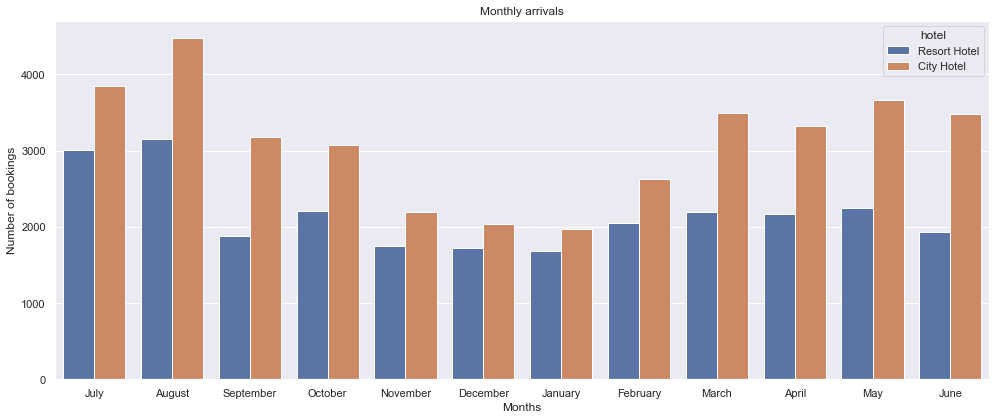

In [20]:
# Month with highest confirmed bookings

plt.figure(figsize = (14, 6))

sns.countplot(x = 'arrival_date_month',
              data = confirmed_bookings, 
              hue = 'hotel' )


plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')

plt.tight_layout()

July & August is the month with high number of guest for both hotel types

Text(0, 0.5, 'Number of bookings')

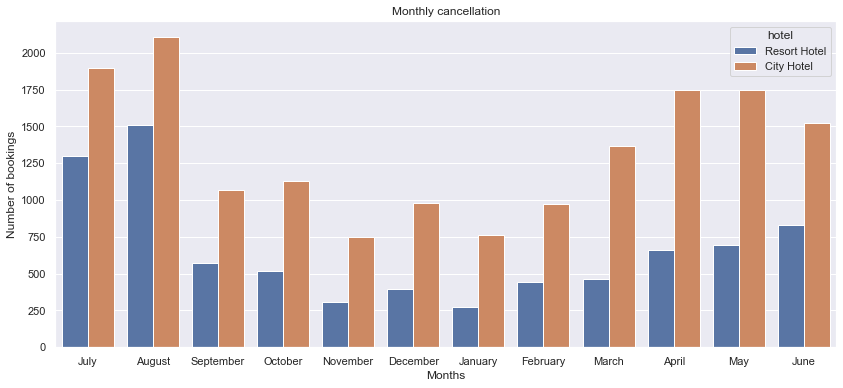

In [21]:
# Month with highest canceled_bookingss

plt.figure(figsize = (14, 6))

sns.countplot(x = 'arrival_date_month',
              data = canceled_bookings, 
              hue = 'hotel' )

plt.title('Monthly cancellation' )
plt.xlabel('Months')
plt.ylabel('Number of bookings')


July & August is the month with high number cancellation for both hotel types

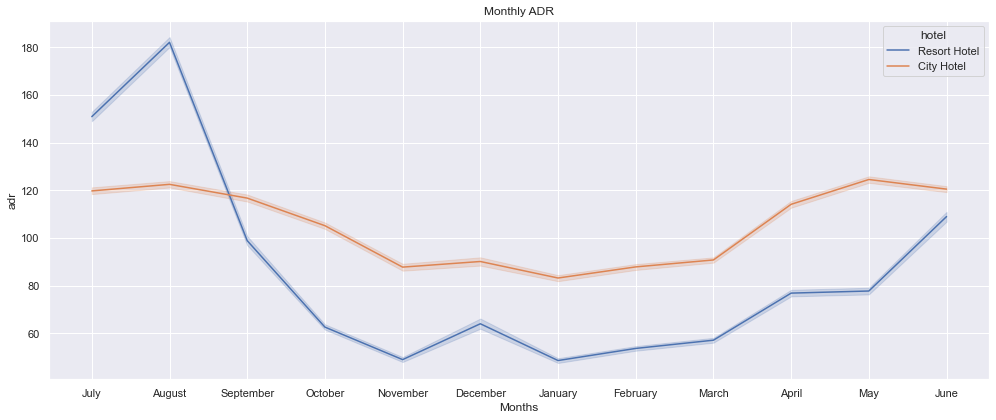

In [22]:
# ADR for the year

plt.figure(figsize = (14, 6))

months = confirmed_bookings['arrival_date_month'].unique()

sns.lineplot(x = 'arrival_date_month', 
            y = 'adr',
            hue = 'hotel', 
            data = confirmed_bookings)


plt.title('Monthly ADR')
plt.xlabel('Months')
plt.xticks(ticks = [m for m in months])

plt.tight_layout()

High adr for July & August due to holiday season and low adr for November - January due to winter season for the Resort Hotel. The spike of the adr in December is due to the Christmas holiday and new year.

High adr from April - September for city hotel.

Text(0.5, 1.0, 'Top 20 Guest Country')

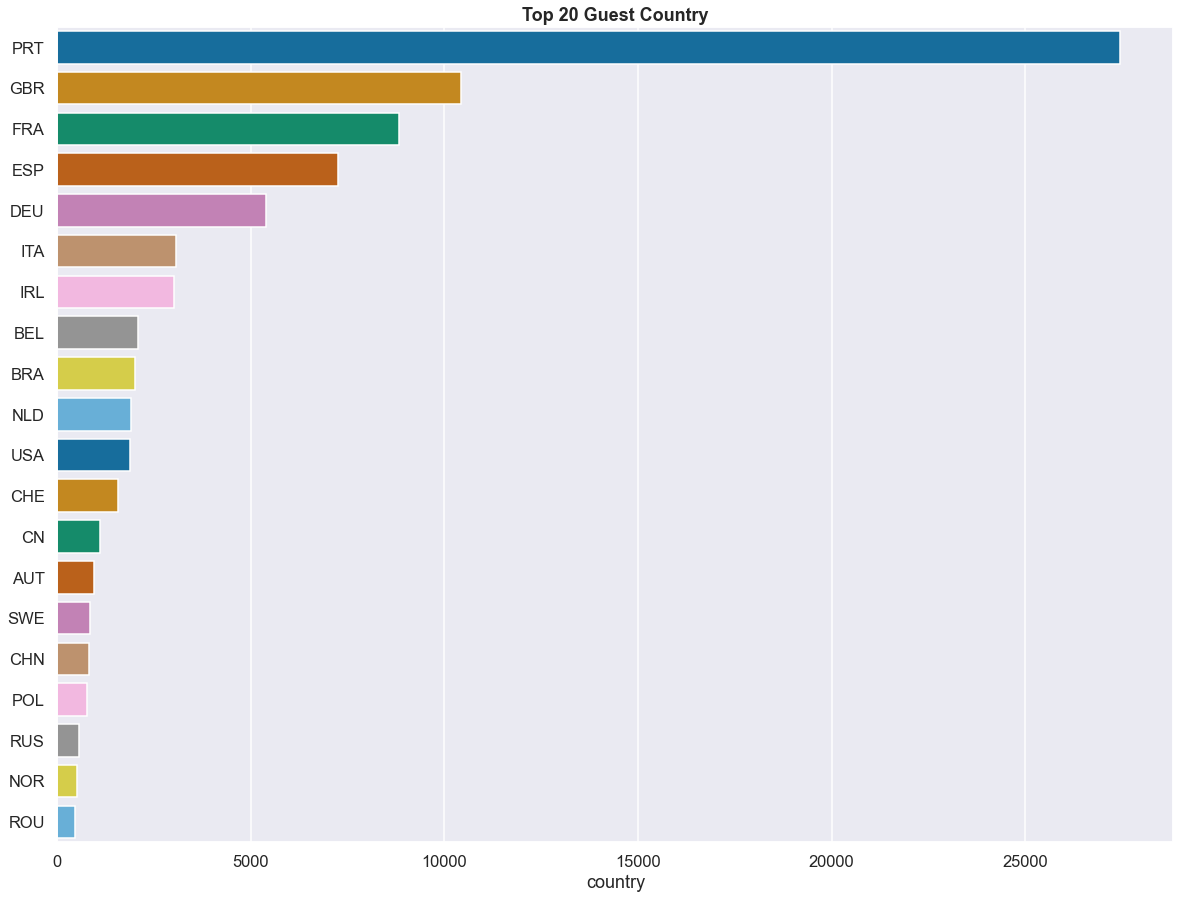

In [23]:
#Top 20 Guest Country

sns.set_context('talk')
plt.figure(figsize=(20,15))
data = df['country'].value_counts().to_frame()[0:20]

sns.barplot(x=data['country'] , y=data.index , data=data , palette='colorblind' )

plt.title('Top 20 Guest Country', weight='bold')

Based on the literature, the hotels' are situated in Portugal (PRT) hence the top rank of the visiting country & count. The top guests are mainly from around the Europe for both hotel types.

Text(0.5, 1.0, 'Bookings by new and repeated guest')

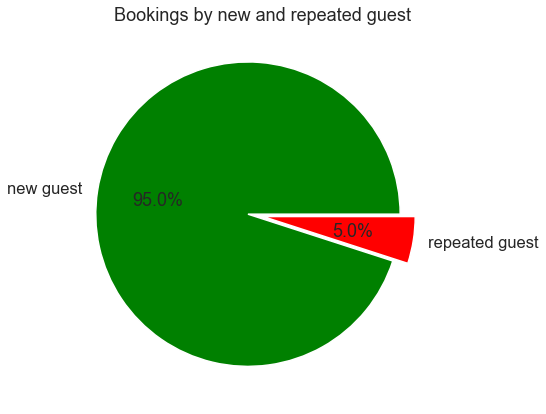

In [24]:
plt.figure(figsize = (12, 7))
labels = ['new guest', 'repeated guest']
explode = [.1, 0]
mycolors = ['green', 'Red' ]
sizes = confirmed_bookings['is_repeated_guest'].value_counts().values

plt.pie(sizes, explode, labels, autopct="%1.1f%%", colors = mycolors)

plt.title('Bookings by new and repeated guest')

The guests are mainly new guest compared to repeated guest

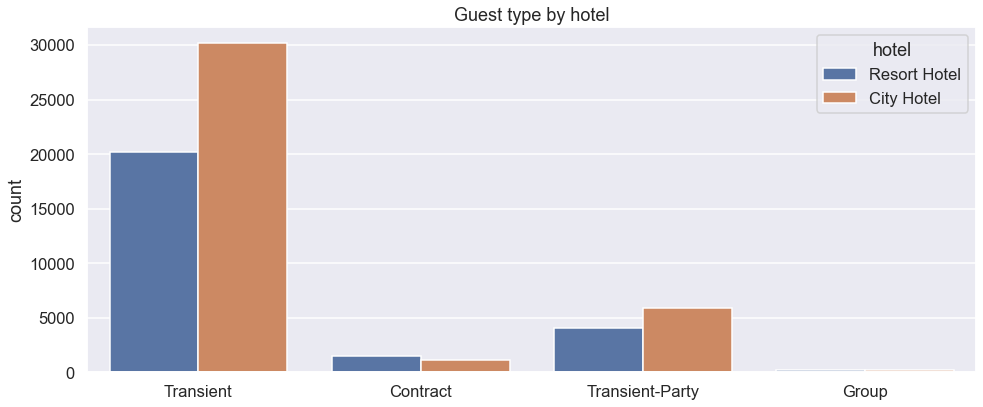

In [25]:
# Guest type

fig, ax = plt.subplots(figsize = (14, 6))

sns.countplot(ax = ax,
            x = 'customer_type', 
            data = confirmed_bookings, 
            hue = 'hotel'
            ).set(xlabel = None)

plt.title('Guest type by hotel')

plt.tight_layout()

As for the guest types, majority of the bookings are the transient type which refers to the case when the booking is not part of a group. It is followed by the transient-party customer type which is associated to at least the other transient booking, contract type & group

In [26]:
df['meal'].value_counts()

BB    67978
SC     9973
HB     9085
FB      360
Name: meal, dtype: int64

([<matplotlib.patches.Wedge at 0x20c2c76cd00>,
 [Text(-0.9433494652153082, 0.7416817285588154, 'Bed and breakfast'),
  Text(0.5909610902048834, -0.9277742127607642, 'No meals'),
  Text(1.033198913038267, -0.3774917298386069, 'Half board'),
  Text(1.1998995486814332, -0.015526528075949465, 'Full board')],
 [Text(-0.5502871880422631, 0.43264767499264234, '78.8%'),
  Text(0.3223424128390273, -0.5060586615058713, '10.5%'),
  Text(0.5635630434754183, -0.20590457991196737, '10.3%'),
  Text(0.6999414033975027, -0.009057141377637187, '0.4%')])

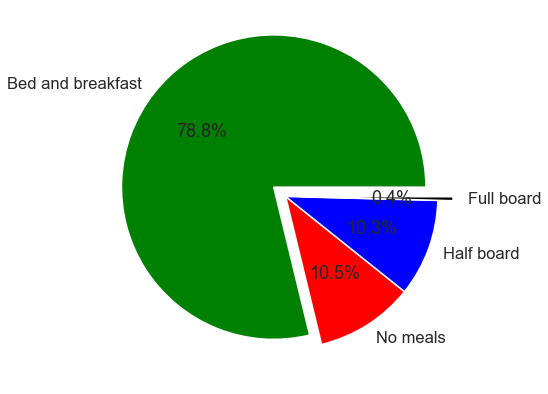

In [27]:
plt.figure(figsize = (12, 7))
labels = ['Bed and breakfast','No meals','Half board','Full board']
explode = [.1, 0,0,.1]
mycolors = ['green', 'Red','blue','black']
sizes = confirmed_bookings['meal'].value_counts().values

plt.pie(sizes, explode, labels, autopct="%1.1f%%", colors = mycolors)

Majority guest prefer bed & breakfast (BB) followed by full board (FB), half board (HB) & self cater (SC)

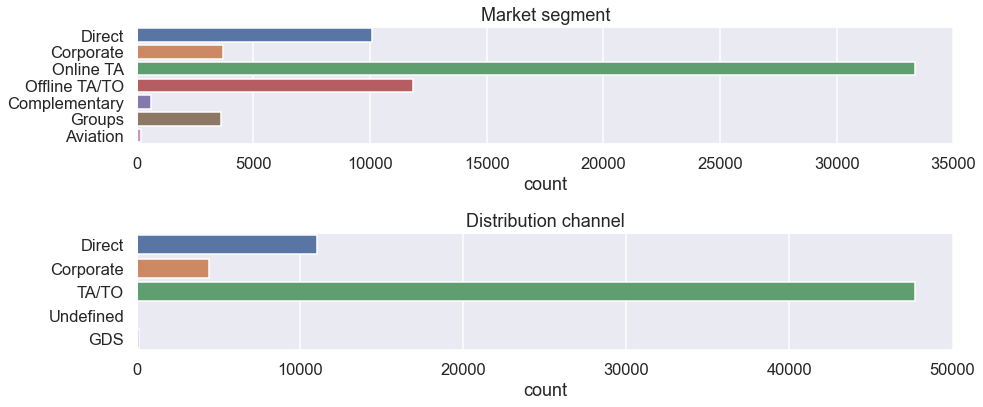

In [28]:
# Market segment & distribution channel

plt.figure(figsize = (14, 6))

plt.subplot(2,1,1)
sns.countplot(data = confirmed_bookings,
            y = 'market_segment', 
            orient = 'h'
            ).set(ylabel = None)
plt.title('Market segment')

plt.subplot(2,1,2)
sns.countplot(data = confirmed_bookings, 
            y = 'distribution_channel', 
            orient = 'h'
            ).set(ylabel = None)
            
plt.title('Distribution channel')

plt.tight_layout()

The main market segment and distribution channel are through the travel agency (TA/TO), followed by the direct booking.We see that most of the records are through Online Travel Agents indicating a strong presence of online travel agents with a strong network in Portugal. There are also records with market_segment as Aviation. These records could be of different flight crews and their stays in these hotels. There are some complementary segments as well. It could indicate a few cases of complaints from the end of customers. This could also indicate a policy of reimbursment or compensation on the part of the hotels.


In [29]:
tbl=pd.crosstab(df.market_segment,df.target,margins=True)
tbl

target,0,1,All
market_segment,,,
Aviation,182,45,227
Complementary,614,88,702
Corporate,3702,510,4212
Direct,10067,1739,11806
Groups,3607,1335,4942
Offline TA/TO,11826,2063,13889
Online TA,33373,18245,51618
All,63371,24025,87396


In [30]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

target,0,1,All,cancel_percent
market_segment,,,,
Aviation,182,45,227,19.823789
Complementary,614,88,702,12.535613
Corporate,3702,510,4212,12.108262
Direct,10067,1739,11806,14.729798
Groups,3607,1335,4942,27.013355
Offline TA/TO,11826,2063,13889,14.853481
Online TA,33373,18245,51618,35.346197
All,63371,24025,87396,27.489816


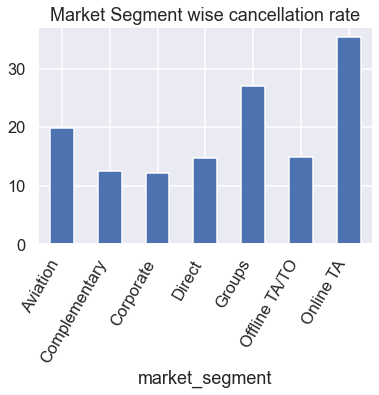

In [31]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Market Segment wise cancellation rate')
plt.xticks(rotation=60,ha='right')
plt.show()

. Among the defined distribution channels Travel agents and tour operators seem to have the highest cancellation rates. Corporate bookings and complementary have the least cancellation rates among all the distribution channels.

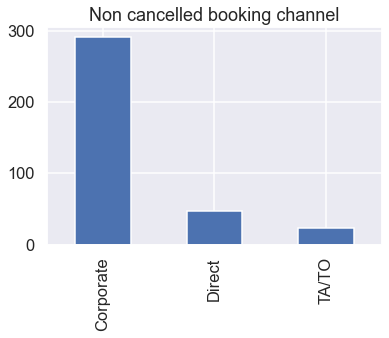

In [32]:
df.loc[df.previous_bookings_not_canceled>10]['distribution_channel'].value_counts().plot.bar()
plt.title('Non cancelled booking channel')
plt.show()


We see that among the booking with higher number non-cancelled previous bookings most of them are from the corporate sector. It seems that the hotel reserves bookings under the corporate name but considers the individuals representing these corporates as seperate guests when considering they are repeated guests or not. Hence we see some corporate records with non-repeated guests but a a large number of non-cancelled previous bookings

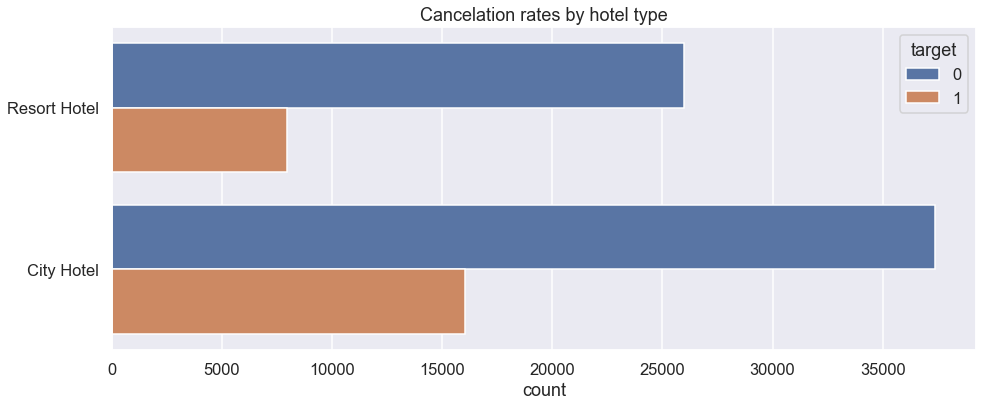

In [33]:
# Hotel cancelation rate

fig, ax = plt.subplots(figsize = (14, 6))

sns.countplot(ax = ax,
            y = 'hotel', 
            data = df, 
            hue = 'target',
            orient= 'h', 
            ).set(ylabel = None)

plt.title('Cancelation rates by hotel type')

plt.tight_layout()

city hotels has a high cancellation rates

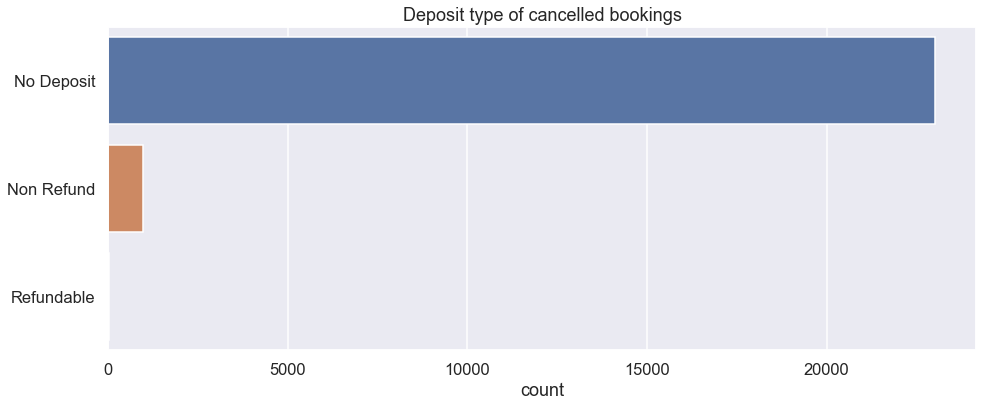

In [34]:
#Deposit type of cancelled bookings

fig, ax = plt.subplots(figsize = (14, 6))

sns.countplot(ax = ax, 
            y = 'deposit_type', 
            data = canceled_bookings, 
            orient = "h",
            ).set(ylabel = None)

plt.title('Deposit type of cancelled bookings')

plt.tight_layout()

Bookings with no deposit are cancelled by the customers most

In [35]:
# We will now check year wise cancellation rate
tbl=pd.crosstab(df.arrival_date_year,df.target,margins=True)
tbl

target,0,1,All
arrival_date_year,,,
2015,10609,2704,13313
2016,31183,11208,42391
2017,21579,10113,31692
All,63371,24025,87396


In [36]:
tbl['cancel-percent']=tbl[1]*100/tbl['All']
tbl

target,0,1,All,cancel-percent
arrival_date_year,,,,
2015,10609,2704,13313,20.310974
2016,31183,11208,42391,26.439574
2017,21579,10113,31692,31.910261
All,63371,24025,87396,27.489816


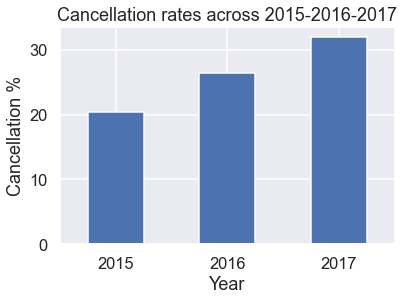

In [37]:
tbl.drop('All',axis=0)['cancel-percent'].plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Cancellation %')
plt.title('Cancellation rates across 2015-2016-2017')
plt.show()

We see that 2017 had the highest cancellation percentage compared to 2015 and 2016. This may be due to some issues with the hotels in 2016, possibly overbooking and customer dissatisfaction. This could also be because of a bit of degraded customer support on the part of the hotels. Also we see that the cancel percentage increases with each passing year.

## Feature Engineering

#### Handling missing value

In [38]:
# Check missing/null value in %

round((df.isnull().sum().sort_values(ascending = False) * 100) / len(df), 2)

company                           93.98
agent                             13.95
country                            0.52
children                           0.00
hotel                              0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
days_in_waiting_list               0.00
previous_bookings_not_canceled     0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
reservation_status_date            0.00
reserved_room_type                 0.00
previous_cancellations             0.00
lead_time                          0.00
is_repeated_guest                  0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   lead_time                       87396 non-null  int64  
 2   arrival_date_year               87396 non-null  int64  
 3   arrival_date_month              87396 non-null  object 
 4   arrival_date_week_number        87396 non-null  int64  
 5   arrival_date_day_of_month       87396 non-null  int64  
 6   stays_in_weekend_nights         87396 non-null  int64  
 7   stays_in_week_nights            87396 non-null  int64  
 8   adults                          87396 non-null  int64  
 9   children                        87392 non-null  float64
 10  babies                          87396 non-null  int64  
 11  meal                            87396 non-null  object 
 12  country                        

In [40]:
df.drop('company',axis=1,inplace=True)

In [41]:
df['agent'].fillna(df['agent'].median() , inplace=True)

In [42]:
df['country'].fillna(df['country'].mode()[0] , inplace=True)

In [43]:
df['children'].fillna(df['children'].median() , inplace=True)

In [44]:
df.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [45]:
df.shape

(87396, 31)

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


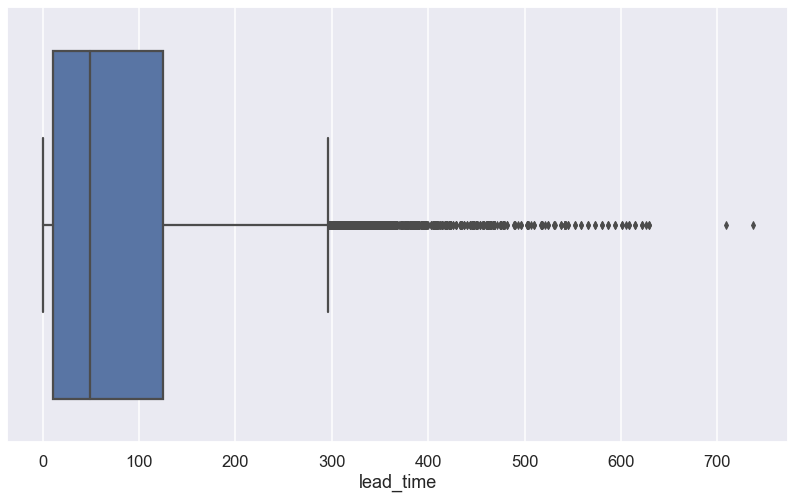

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


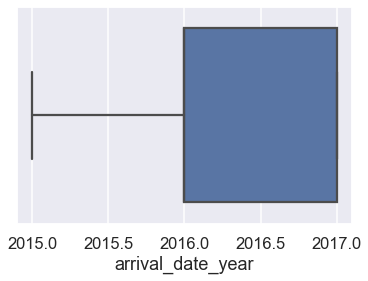

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


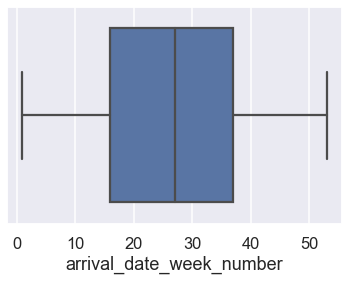

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


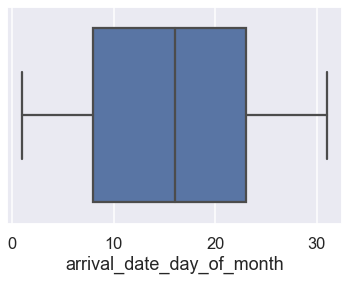

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


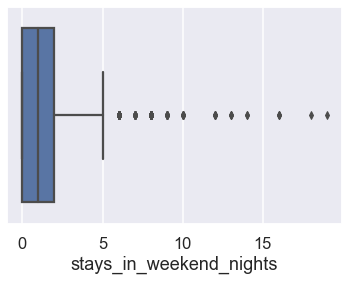

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


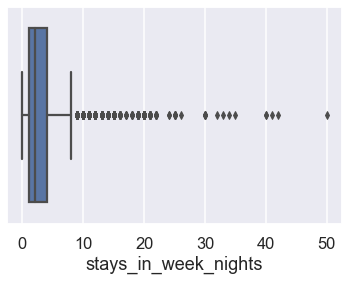

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


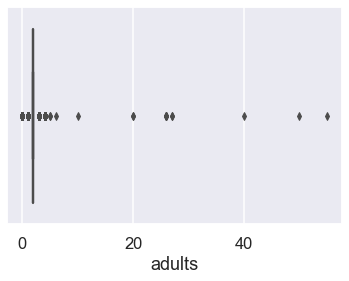

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


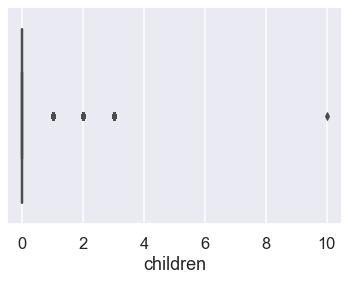

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


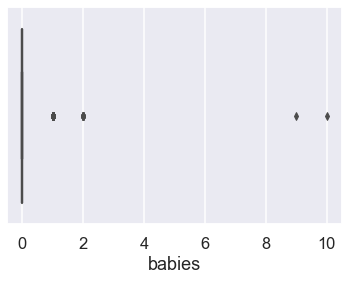

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


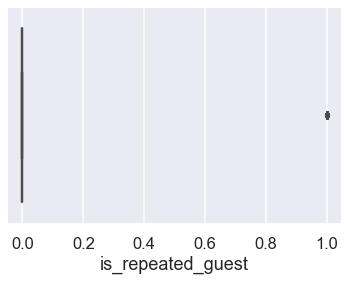

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


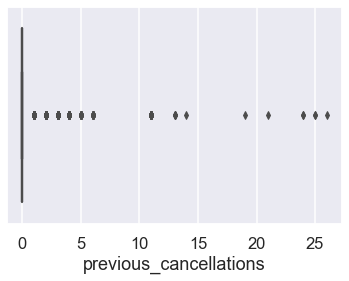

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


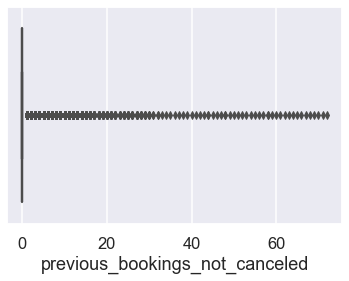

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


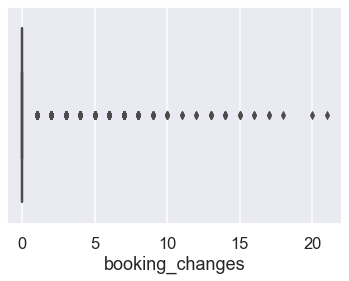

C:\Users\thoma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


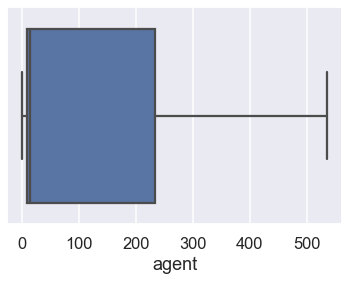

KeyError: 'company'

In [46]:
plt.figure(figsize=(14,8))

for i in num_list:
    sns.boxplot(df[i])
    plt.show()

In [47]:
Q1 = df.lead_time.quantile(0.25)
Q3 = df.lead_time.quantile(0.75)



IQR = Q3 - Q1
df = df[(df.lead_time>= Q1 -1.5 *IQR) & (df.lead_time <= Q3 + 1.5*IQR)]

In [48]:
Q1 = df.stays_in_weekend_nights.quantile(0.25)
Q3 = df.stays_in_weekend_nights.quantile(0.75)

IQR = Q3 - Q1
df = df[(df.stays_in_weekend_nights>= Q1 -1.5 *IQR) & (df.stays_in_weekend_nights <= Q3 + 1.5*IQR)]

In [49]:
df['previous_bookings_not_canceled'].quantile(0.99)

5.0

In [50]:
#From the boxplot and the quantile point considering the observations less than  and equal to 5
df =df[df['previous_bookings_not_canceled'] <= 5]

In [51]:
df['booking_changes'].quantile(0.99)

3.0

In [52]:
#From the boxplot and the quantile point considering the observations less than  and equal to 3
df =df[df['booking_changes'] <= 3]

In [53]:
df['previous_cancellations'].quantile(0.99)

1.0

In [54]:
#From the boxplot and the quantile point considering the observations less than  and equal to 1
df =df[df['previous_cancellations'] <= 1]

In [55]:
# Total nights per booking
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Create new 'family' feature for adult, children & baby group
df['family'] = df['children'] +  df['babies'] + df['adults']

In [56]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'target',
       'total_nights', 'family'],
      dtype='object')

In [57]:
df.drop(df[['stays_in_week_nights','stays_in_weekend_nights','children','babies','adults','agent','reservation_status','reservation_status_date']],axis=1,inplace=True)


## Feature Selection

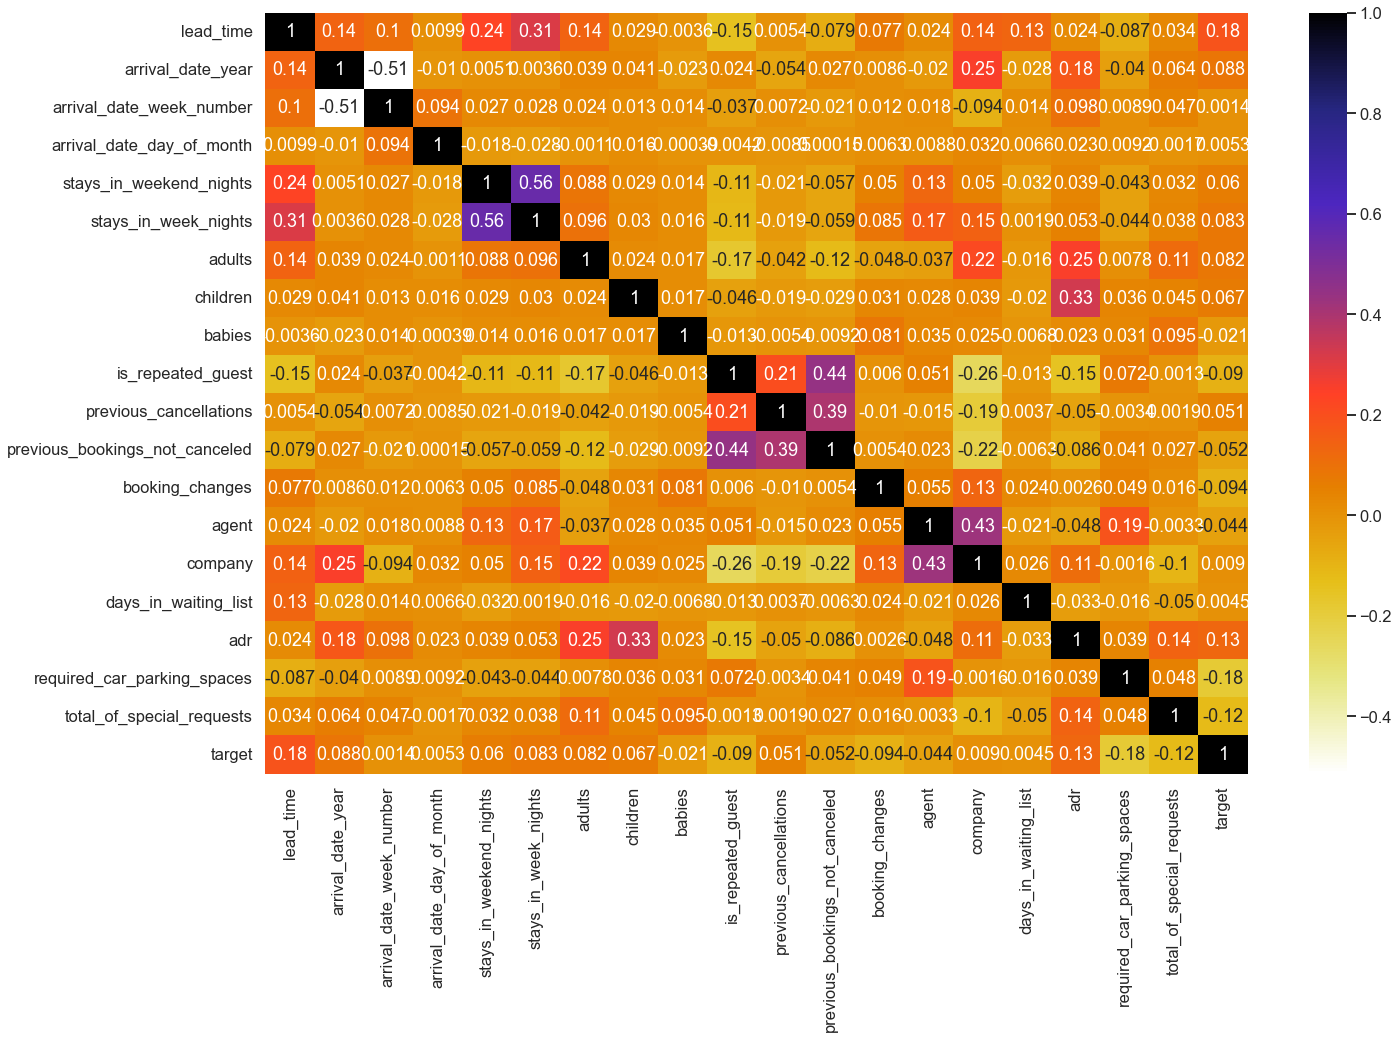

In [58]:
# Analyze the relation between dependent and independent variable using Correlation Matrix / Heatmap
plt.figure(figsize = (22, 14))
cor = num_list.corr()
sns.heatmap(cor, annot = True, cmap = 'CMRmap_r')
plt.show()

From the Heatmap, lead_time, required_car_parking_spaces, deposit_type, distribution_channel, adr, total_of_special_requests, customer_type previous_cancellations, booking_changes, total_nights, previous_bookings_not_canceled,  and company are considered as the most important features in determining the bookings cancellation

In [59]:
# We observed that out of all the features we have one insignificant feature namely, days in waiting list
# So we would drop this variable from our model bulding

df.drop('days_in_waiting_list',inplace=True,axis=1)

In [60]:
df.drop('arrival_date_year',axis=1,inplace=True)

###### Label encoder

In [61]:
cat_list=df.select_dtypes('object')

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
for x in cat_list:
    df[x] = le.fit_transform(df[x])

In [64]:
df.head()

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,...,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,target,total_nights,family
2,1,7,5,27,1,0,58,3,1,0,...,2,0,0,2,75.0,0,0,0,1,1.0
3,1,13,5,27,1,0,58,2,0,0,...,0,0,0,2,75.0,0,0,0,1,1.0
4,1,14,5,27,1,0,58,6,3,0,...,0,0,0,2,98.0,0,1,0,2,2.0
6,1,0,5,27,1,0,134,3,1,0,...,2,0,0,2,107.0,0,0,0,2,2.0
7,1,9,5,27,1,1,134,3,1,0,...,2,0,0,2,103.0,0,1,0,2,2.0


## Balance the dataset using SMOTE and  Normalizing and Data splitting 

In [65]:
X = df.drop(['target'], axis = 1)
y = df.target

In [66]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=23)
X , y =sm.fit_resample(X,y)

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [68]:
X=scaler.fit_transform(X)

In [69]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [70]:
X_train.shape, X_test.shape

((97203, 22), (24301, 22))

## Model Building and Evaluation

##### Logistic regression

In [75]:

from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

In [77]:
# Fit the Logistic Regression Model

# create the instance of logistic regression model
lr = LogisticRegression()

# fit the model
lr.fit(X_train, y_train)

LogisticRegression()

In [78]:
# Make a prediction for the testing set
y_pred_lr = lr.predict(X_test)

In [79]:
# print the accuracy on test data

print("Accuracy Score on test data with Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Accuracy Score on test data with Logistic Regression: 0.754001892926217


In [80]:
# print the precison-score

print('Precision Score with LR:', precision_score(y_test, y_pred_lr))

Precision Score with LR: 0.7385481661847512


In [81]:
# print the recall-score

print('Recall Score:', recall_score(y_test, y_pred_lr))

Recall Score: 0.7924559111691705


In [82]:
# print the classification report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     12053
           1       0.74      0.79      0.76     12248

    accuracy                           0.75     24301
   macro avg       0.76      0.75      0.75     24301
weighted avg       0.76      0.75      0.75     24301



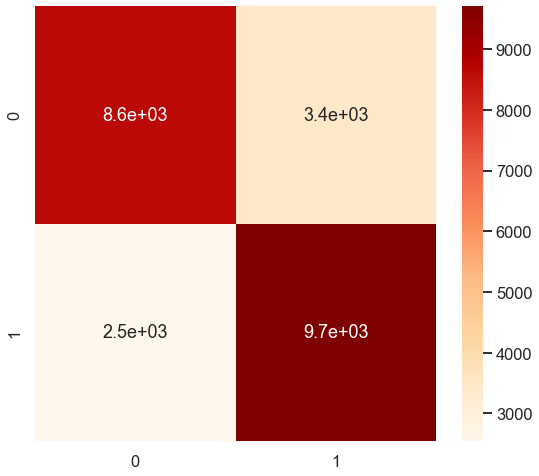

In [83]:
## Plot the confusion matrix

plt.figure(figsize = (9, 8))

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'OrRd')
plt.show()

##### K N N classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier


In [72]:
# Fit the Logistic Regression Model

knn = KNeighborsClassifier(n_neighbors=3)

#fit the model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
# Make a prediction for the testing set
y_pred_knn = knn.predict(X_test)

In [77]:
# print the accuracy on test data

print("Accuracy Score on test data with KNN:", accuracy_score(y_test, y_pred_knn))

Accuracy Score on test data with KNN: 0.8151104892802765


In [78]:
# print the precison-score

print('Precision Score with knn:', precision_score(y_test, y_pred_knn))

Precision Score with knn: 0.7987518298790354


In [79]:
# print the recall-score

print('Recall Score:', recall_score(y_test, y_pred_knn))

Recall Score: 0.8464239059438275


In [80]:


# print the classification report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81     12053
           1       0.80      0.85      0.82     12248

    accuracy                           0.82     24301
   macro avg       0.82      0.81      0.81     24301
weighted avg       0.82      0.82      0.81     24301



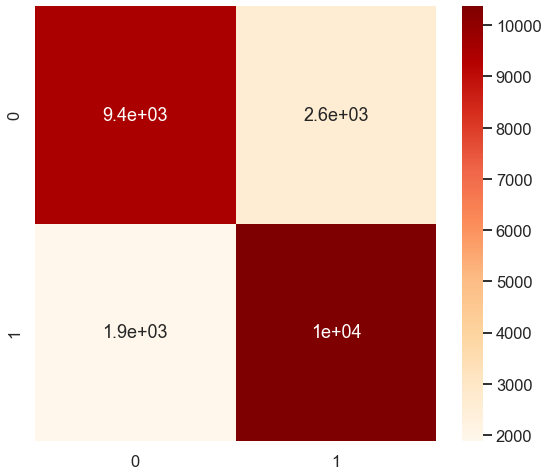

In [81]:
## Plot the confusion matrix

plt.figure(figsize = (9, 8))

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot = True, cmap = 'OrRd')
plt.show()

#### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
# Fit the Decision Tree Model

# create the instance of DT model
dt = DecisionTreeClassifier(max_depth=500)

# fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=500)

In [94]:
# Make a prediction for the testing set
y_pred_dt = dt.predict(X_test)

In [95]:
print("Accuracy Score on test data using Decision classifier:", accuracy_score(y_test, y_pred_dt))

Accuracy Score on test data using Decision classifier: 0.8230113987078721


In [96]:
# print the precison-score

print('Precision Score with DT:', precision_score(y_test, y_pred_dt))

Precision Score with DT: 0.8181599807830892


In [97]:
# print the recall-score

print('Recall Score:', recall_score(y_test, y_pred_dt))

Recall Score: 0.8342586544741999


In [98]:
# print the classification report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     12053
           1       0.82      0.83      0.83     12248

    accuracy                           0.82     24301
   macro avg       0.82      0.82      0.82     24301
weighted avg       0.82      0.82      0.82     24301



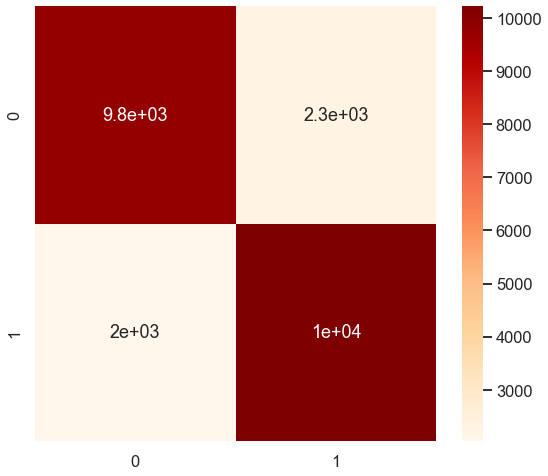

In [99]:
## Plot the confusion matrix

plt.figure(figsize = (9, 8))

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, cmap = 'OrRd')
plt.show()

##### AdaBoost classifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
adb=AdaBoostClassifier(base_estimator=dt,n_estimators=115,learning_rate=1)

In [102]:
adb.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=500),
                   learning_rate=1, n_estimators=115)

In [103]:
# Make a prediction for the testing set
y_pred_adb = adb.predict(X_test)

In [104]:
print("Accuracy Score on test data using AdaBoost classifier:", accuracy_score(y_test, y_pred_adb))

Accuracy Score on test data using AdaBoost classifier: 0.8657668408707461


In [105]:
# print the classification report

print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     12053
           1       0.86      0.87      0.87     12248

    accuracy                           0.87     24301
   macro avg       0.87      0.87      0.87     24301
weighted avg       0.87      0.87      0.87     24301



##### Random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rand_clf = RandomForestClassifier(random_state=1)

In [108]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [109]:
rand_clf.score(X_test,y_test)

0.8803341426278753

In [110]:
# Make a prediction for the testing set
y_pred_rf = rand_clf.predict(X_test)

In [111]:
# print the classification report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12053
           1       0.88      0.88      0.88     12248

    accuracy                           0.88     24301
   macro avg       0.88      0.88      0.88     24301
weighted avg       0.88      0.88      0.88     24301



###### Hyper parameter tuning

In [113]:
# we are tuning five hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [100,150,175,200,225,250,275,300,350],
    'criterion': [ 'entropy'],
    'min_samples_leaf' : [2],
    'min_samples_split': [2,],
    'max_features' : ['auto','sqrt']
}

In [114]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [115]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\thoma\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [100, 150, 175, 200, 225, 250, 275,
                                          300, 350]},
             verbose=3)

In [116]:
#let's see the best parameters as per our grid search
grid_search.best_params_


{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 350}

In [118]:
rand_clf_gscv = RandomForestClassifier(criterion= 'entropy',
 max_features = 'auto',
 min_samples_leaf = 2,
 min_samples_split= 2,
                                       
 n_estimators = 350,random_state=1)

In [119]:
rand_clf_gscv.fit(X_train,y_train)

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=2, n_estimators=350, random_state=1)

In [124]:
rand_clf_gscv.score(X_test,y_test)

0.8765894407637546